<a href="https://colab.research.google.com/github/lizhicq/AI-course/blob/master/%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E8%B0%83%E5%8F%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Aache/MLCC')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error

train = pd.read_csv('./data/train_1.csv')
y = np.asarray(train['SalePrice'])
train1 = train.drop(['Id','SalePrice'],axis=1)
X = np.asarray(pd.get_dummies(train1).reset_index(drop=True))
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.2)


def benchmark(model):
    pred=model.predict(X_test)
    logrmse=np.sqrt(mean_squared_error(np.log(y_test),np.log(pred)))
    return logrmse


def benchmark1(model, testset, label):
    pred=model.predict(testset)
    if pred[pred<0].shape[0]>0:
        print('Neg Value')
    rmse=np.sqrt(mean_squared_error(label,pred))
    lrmse=np.sqrt(mean_squared_error(np.log(label),np.log(pred)))

    print('RMSE:',rmse)
    print('LRMSE:',lrmse)
    return lrmse

In [0]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor
def benchmark1(model, testset, label):
    pred=model.predict(testset)
    if pred[pred<0].shape[0]>0:
        print('Neg Value')
    rmse=np.sqrt(mean_squared_error(label,pred))
    lrmse=np.sqrt(mean_squared_error(np.log(label),np.log(pred)))

    print('RMSE:',rmse)
    print('LRMSE:',lrmse)
    return lrmse

Using TensorFlow backend.


In [0]:
import time
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu' ))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam',loss='mean_squared_error')
    return model 
model = create_model()
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=3350, batch_size=32, verbose=0)
print('spent', time.time() - start)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
spent 137.29622316360474


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                3050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 3,411
Trainable params: 3,411
Non-trainable params: 0
_________________________________________________________________
RMSE: 26872.19281991914
LRMSE: 0.13803499463041338


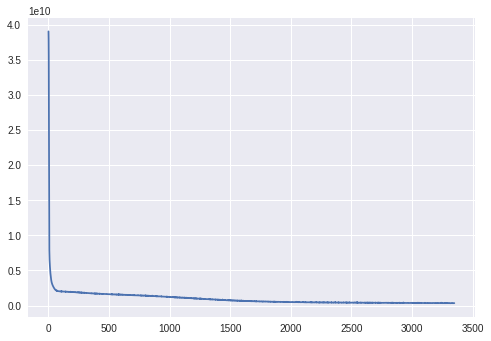

In [0]:
model.summary()
benchmark1(model,X_test,y_test)
plt.plot(history.history['loss'])

RMSE: 25776.069354829327
LRMSE: 0.1350799470928939
spend 135.10757398605347


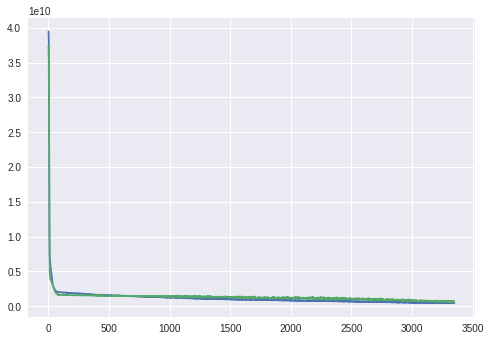

In [0]:
model=create_model()
start = time.time()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                  epochs=3350,batch_size=32,verbose=0)
benchmark1(model,X_test,y_test)
print('spend', time.time() - start)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
model=create_model()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),
                  epochs=3350,batch_size=32,verbose=0)

benchmark1(model,X_test,y_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
#small sample for testing
from sklearn.model_selection import GridSearchCV
model = KerasRegressor(build_fn=create_model)
batch_size = [10]
epochs = [1000]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -840791679.287671 using {'batch_size': 10, 'epochs': 1000}
-840791679.287671 (207825610.176968) with: {'batch_size': 10, 'epochs': 1000}


In [9]:
from sklearn.model_selection import GridSearchCV
model = KerasRegressor(build_fn=create_model)
batch_size = [80, 100]
epochs = [5000]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=0, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/5000
1168/1168 [==============================] - 0s 300us/step - loss: 39062722279.4520
Epoch 2/5000
1168/1168 [==============================] - 0s 25us/step - loss: 38765542694.5753
Epoch 3/5000
1168/1168 [==============================] - 0s 26us/step - loss: 38343251547.1781
Epoch 4/5000
1168/1168 [==============================] - 0s 26us/step - loss: 37713613809.9726
Epoch 5/5000
1168/1168 [==============================] - 0s 28us/step - loss: 36827698723.0685
Epoch 6/5000
1168/1168 [==============================] - 0s 27us/step - loss: 35598889212.4931
Epoch 7/5000
1168/1168 [==============================] - 0s 25us/step - loss: 33993369908.6027
Epoch 8/5000
1168/1168 [==============================] - 0s 26us/step - loss: 32057988390.5753
Epoch 9/5000
1168/1168 [==============================] - 0s 30us/step - loss: 29691122084.8219
Epoch 10/5000
1168/1168 [==============================] - 0s 29us/step - loss: 27009618396.9315
Epoch 11/5000
1168/1168 [=============